# K Nearest Neighbors Project 


## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
plt.style.use('seaborn')

## Get the Data
** Read the 'KNN_Project_Data csv file into a dataframe **

In [2]:
df = pd.read_csv("KNN_Project_Data")

**Check the head of the dataframe.**

In [3]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

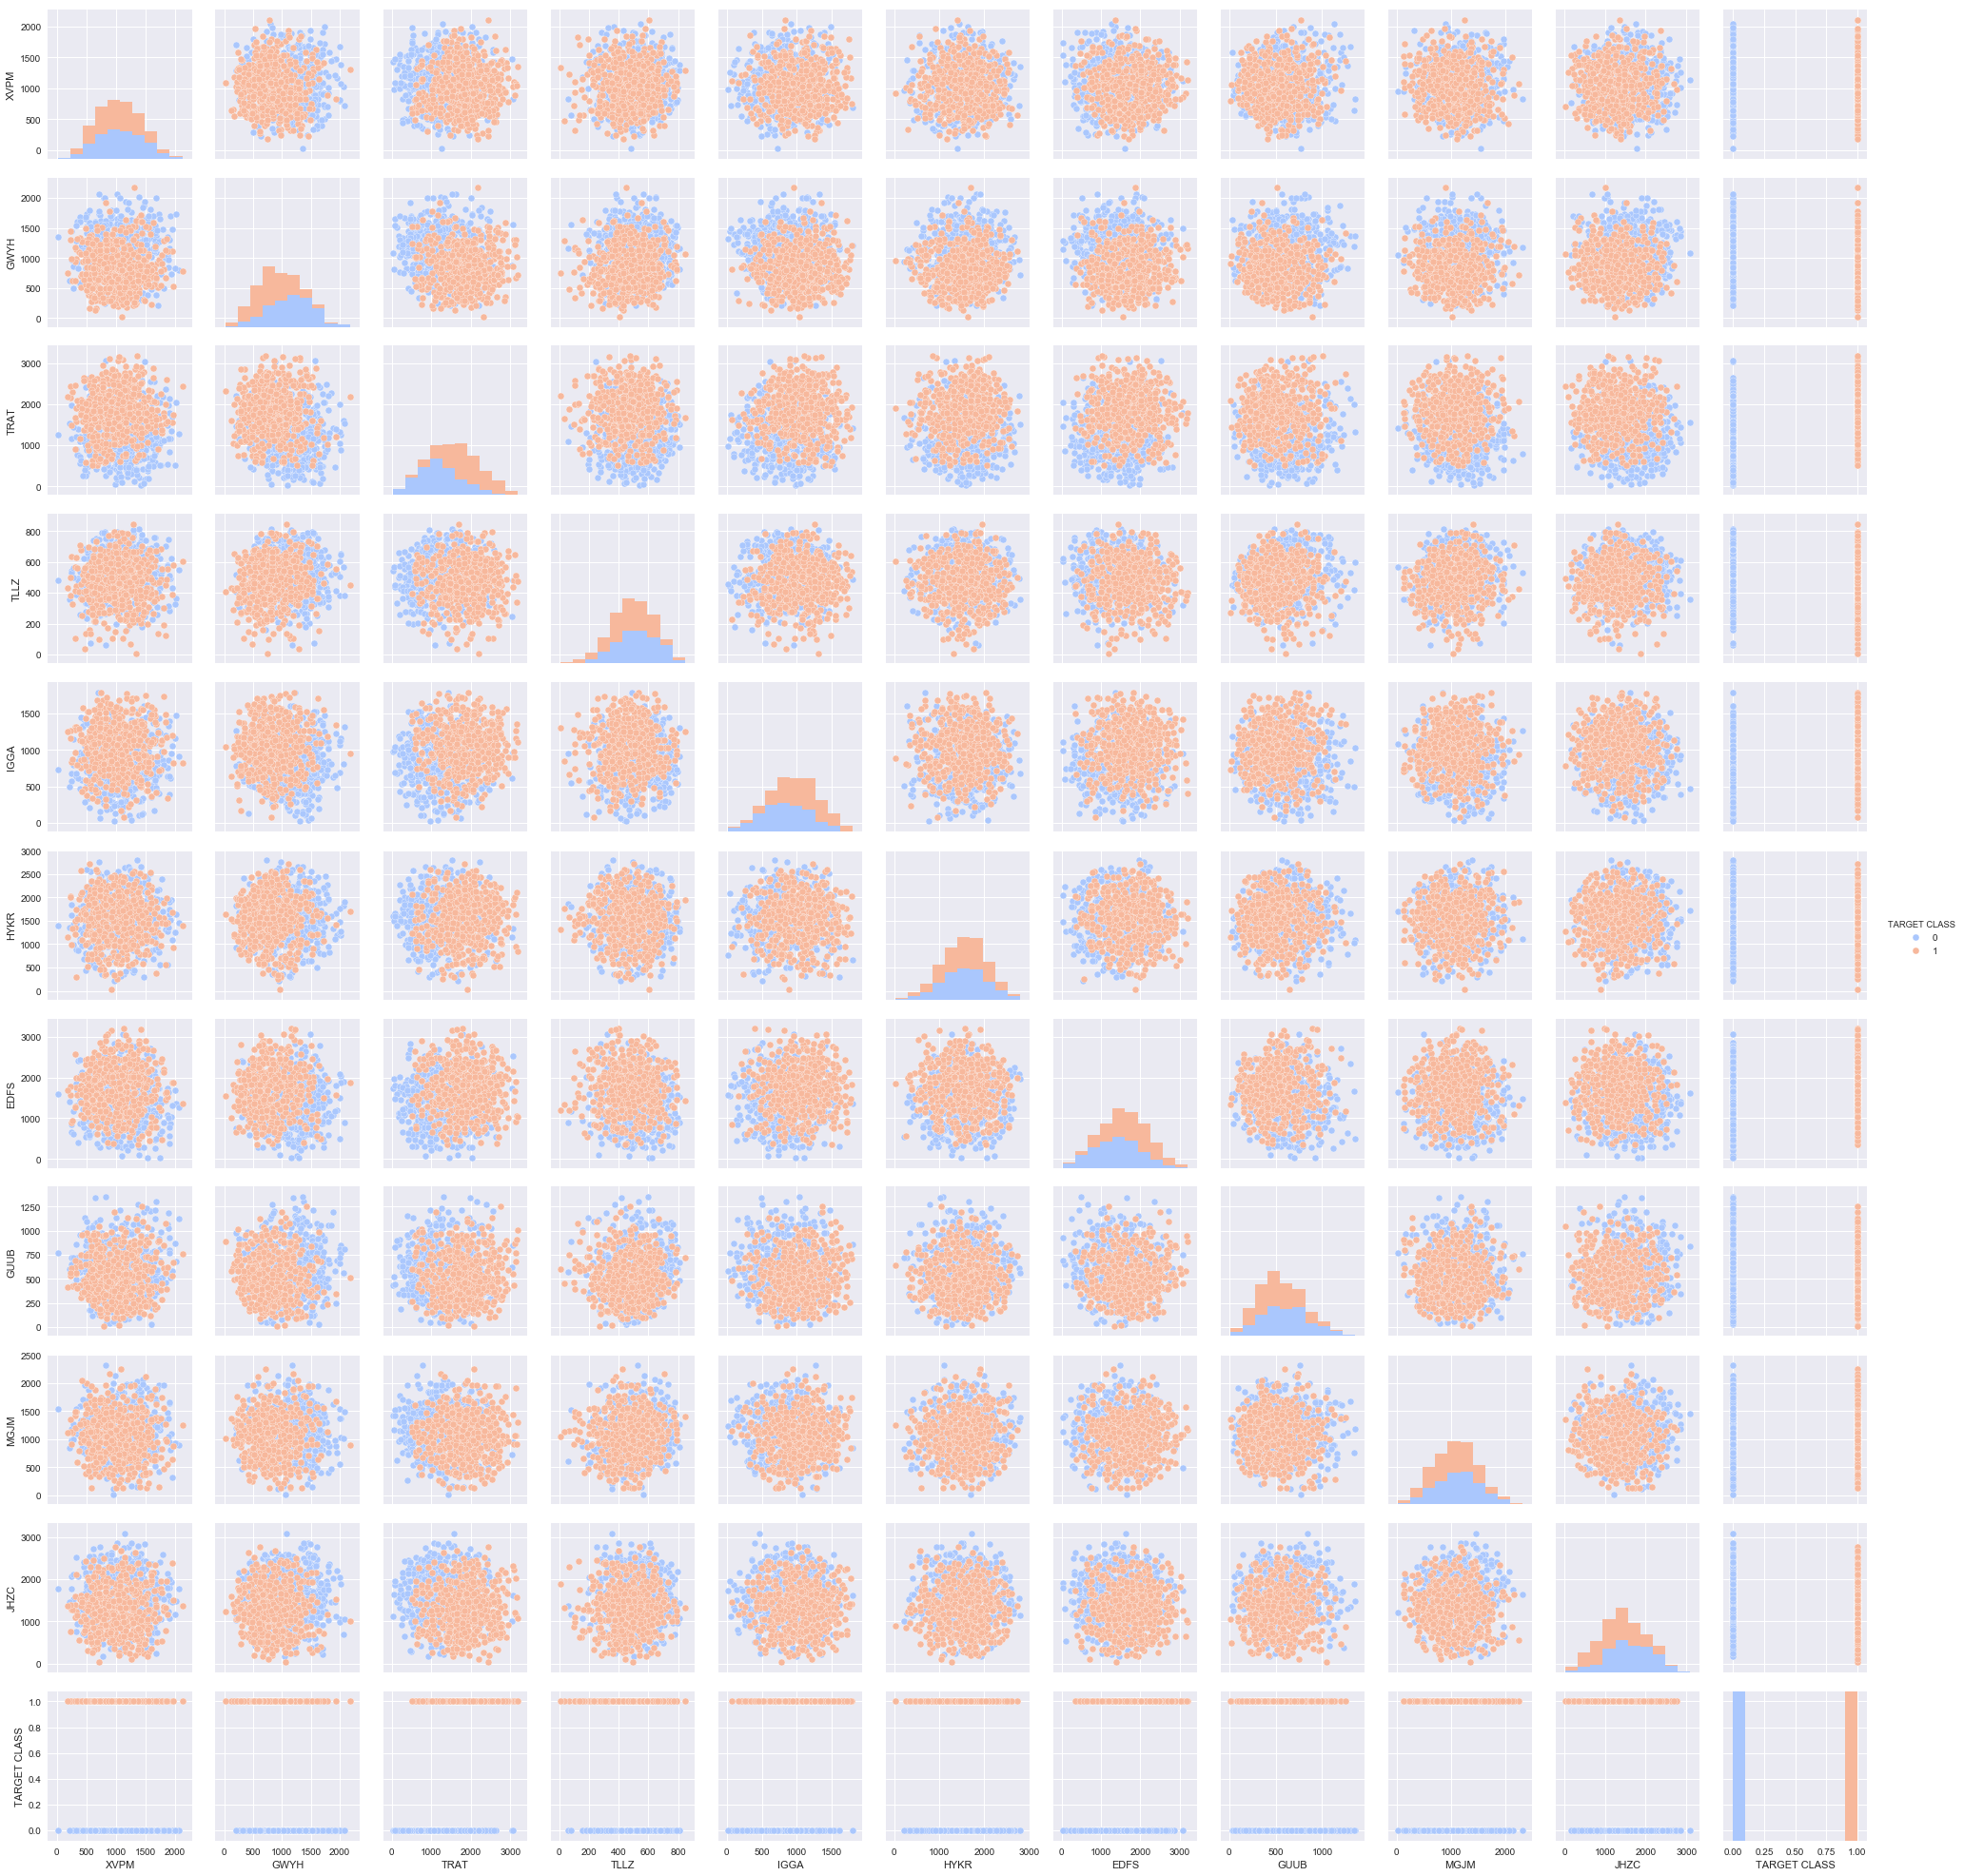

In [56]:
sns.pairplot(df,hue='TARGET CLASS',palette='coolwarm')
plt.show()

# Standardize the Variables

Time to standardize the variables.

** Import StandardScaler from Scikit learn.**

In [4]:
from sklearn.preprocessing import StandardScaler

** Create a StandardScaler() object called scaler.**

In [15]:
scaler = StandardScaler()

** Fit scaler to the features.**

In [16]:
features = scaler.fit(df.drop('TARGET CLASS',axis=1))

In [17]:
features

StandardScaler(copy=True, with_mean=True, with_std=True)

**Use the .transform() method to transform the features to a scaled version.**

In [18]:
feat = scaler.transform(df.drop('TARGET CLASS',axis=1))

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [21]:
scaled_feat = pd.DataFrame(feat,columns=df.columns[:-1])
scaled_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test = train_test_split(feat,df['TARGET CLASS'],test_size=0.3)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [24]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

In [25]:
Knn = KNeighborsClassifier(n_neighbors=1)

**Fit this KNN model to the training data.**

In [27]:
Knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [28]:
pred = Knn.predict(X_test)

** Create a confusion matrix and classification report.**

In [30]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,pred))

[[104  50]
 [ 31 115]]


In [31]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.77      0.68      0.72       154
          1       0.70      0.79      0.74       146

avg / total       0.73      0.73      0.73       300



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [50]:
error_rate = []

for k in range(1,41):
    kn = KNeighborsClassifier(n_neighbors=k)
    kn.fit(X_train,y_train)
    prediction = kn.predict(X_test)
    error_rate.append(np.mean(prediction!=y_test))

**Now create the following plot using the information from your for loop.**

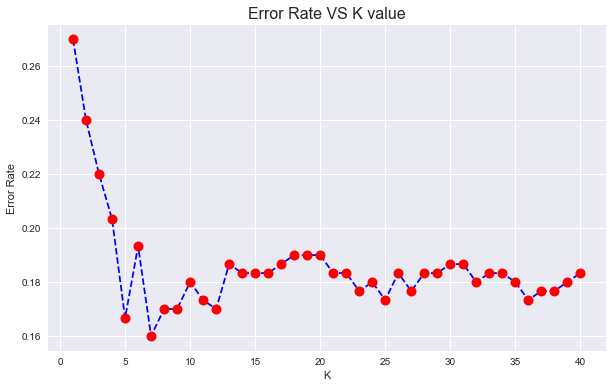

In [51]:
plt.figure(figsize=(10,6))
plt.plot(range(1,41),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title("Error Rate VS K value",fontsize=16)
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [54]:
model = KNeighborsClassifier(n_neighbors=9)
model.fit(X_train,y_train)
p = model.predict(X_test)

In [55]:
from sklearn.metrics import accuracy_score
print("With K=9")
print('\n')
print("Accuracy score : ",accuracy_score(y_test,p))
print("Confusion matrix : \n",confusion_matrix(y_test,p))
print('\n')
print(classification_report(y_test,p))

With K=9


Accuracy score :  0.83
Confusion matrix : 
 [[123  31]
 [ 20 126]]


             precision    recall  f1-score   support

          0       0.86      0.80      0.83       154
          1       0.80      0.86      0.83       146

avg / total       0.83      0.83      0.83       300



# Great Job!